<a href="https://colab.research.google.com/github/stanislawWojtas/Uczenie-Maszynowe/blob/main/Wyklad_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

## Klasyfikacja

#### Wykorzystuje się to do:
- liniowa separacja
- liniowe klasyfikatory
- margines klasyfikacji: utworzenie jak najszerszej "ulicy" podczas klasami
- dodanie nowych instancji poza "ulica" nie wpływa na klasyfikacje
- granica klas jest oparta (supported) o instancje leżące na granicy "ulicy"
- instancje nazywane są ***support vectors*** (wektory nośne).

#### SVM jest wrażliwy na **skalę**
Dlatego klasyfikacja na oryginalnych wartościach może być słabym pomysłem.

❗**Więc przed zastosowaniem SVM należy przeskaliwać dane aby wszystkie cechy miały podobną skalę ❗**

#### Problemy klasyfikacją SVM - wartości odstające
Wartości odstające (*outliers*) mogą sprawić, że klasyfikacja SVM będzie **niemożliwa**. Dzieje się tak gdy nie możemy liniowo rozdzielić klasy.

#### Soft Margin Classification
Wprowadza parametr **C**, który pozwala na "naruszenie" marginesu. Im jest on większy (domyślnie C=1) tym bardziej chcemy się dopasować do danych - wąska granica ale mniej punktów ją przekracza.

Jeżeli występuje *overfitting* to należy zmniejszyć parametr **C**.

#### SVM, uczenie

Klasa *Pipeline* pozwala na uruchomienie wielu procesów wedle sekwencji na liście. W naszym przypadku najpierw skalujemy za *pomocą StandardScaler()* a potem używamy na tych przeskalowanych dancyh klasyfikatora *LinearSVC()*.

W LinearSVC parametr loss="hinge" powoduje wybranie funkcji straty, a za pomocą C=1 definiujemy wartość soft margin.

In [22]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import datasets

# Klasa Pipeline pozwal
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # długość płatka, szerokość płatka
y = (iris["target"] == 2).astype(np.int8)  # Iris virginica
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

#### SVM, klasyfikacja
Moża zobaczyć:
- kwaitek o długości płatka 5.5 cm i szerokości 1.7 cm to Iris virginita
- kwiatek o długości płatka 4.5 cm i szerokości 1.7 cm to **nie** Iris virginita

In [23]:
print(svm_clf.predict([[5.5, 1.7],
                       [4.5, 1.7]]))

[1 0]


#### SVM, klasyfikacja nieliniowa
W takim przypadku SVM nie zadziała (bo jest to klasyfikator liniowy)

W tym przypadku możemy dodać więcej cech (wymiarów) i użyć klasyfikatora liniowego.

Lecz istnieje problem w przypadku gdy:
1. Mamy przestrzeń dwuwymiarową ($x_1$, $x_2$, $x_1^2$, $x_2^2$)
2. Cechy nie muszą być niezależnie więc przy zwiększeniu wymiarowości warto zastanowić się nad dodaniem nowych cech ($x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$, $x_1^2 x_2^2$).

#### SVM, nieliniowa, dane

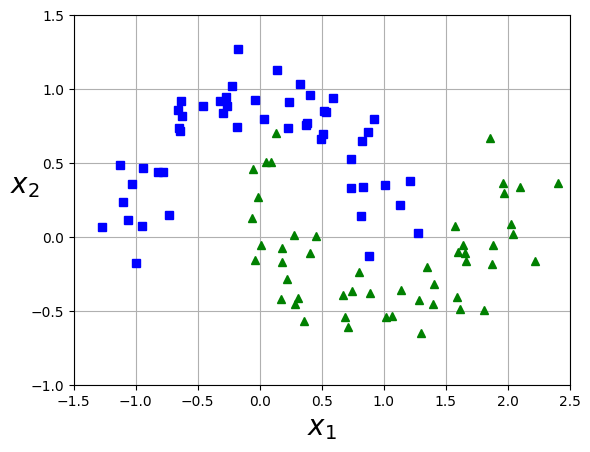

In [24]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### SVM, nieliniowa, uczenie

In [25]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=3000, random_state=42)) #max iter żeby byla zbieżność
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=3000,
                           random_state=42))])

#### SVM, nieliniowa, klasyfikacja

In [26]:
print(polynomial_svm_clf.predict([[0.5, 0],
                                  [1, 0]]))

[1 0]


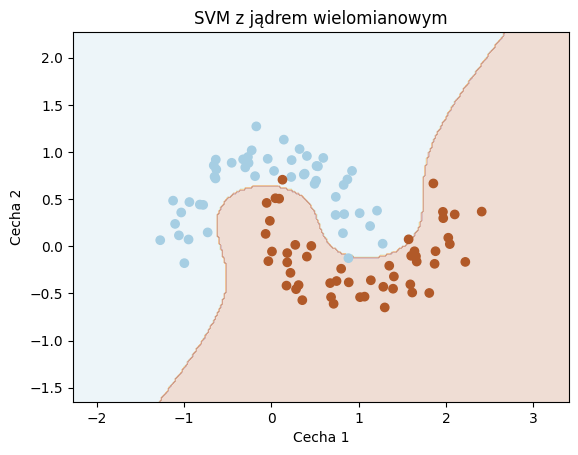

In [27]:
# Stwórz siatkę punktów do wizualizacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Oblicz przewidywania modelu dla siatki punktów
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Użyj polynomial_svm_clf
Z = Z.reshape(xx.shape)
# Wygeneruj wykres
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('SVM z jądrem wielomianowym') # Zmień tytuł
plt.show()

#### SVM, nieliniowa klasyfikacja, raz jeszcze

Główne różnice w sposobach:
- PolynomialFeatures + LinearSVC: Ta metoda najpierw tworzy nowe cechy wielomianowe z istniejących cech wejściowych. Następnie trenuje klasyfikator liniowy (np. LinearSVC) na tych nowych cechach. Klasyfikacja odbywa się w przestrzeni cech wielomianowych.

- SVM z jądrem wielomianowym: SVM z jądrem
wielomianowym oblicza podobieństwo między punktami danych w przestrzeni cech wielomianowych bez jawnego tworzenia tych cech. Wykorzystuje "sztuczkę jądra" (kernel trick), aby obliczyć te podobieństwa w sposób efektywny. Klasyfikacja odbywa się na podstawie tych podobieńst

In [28]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly_kernel_svm_clf.fit(X, y)
print(poly_kernel_svm_clf.predict([[0.5, 0],
                                   [1, 0]]))

[1 0]


Im większy *r* = coef0 tym większy wpływ wielomianów wysokiego stopnia. Dlatego nie ma co zwiększac *r* jeśli nie mamy wielomianu wysokiego stopnia.

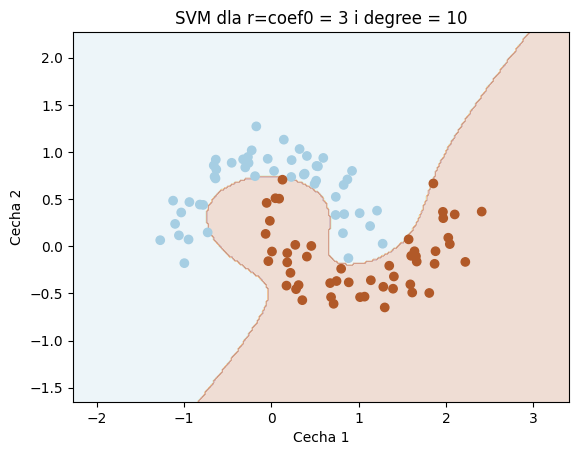

In [29]:
# Stwórz siatkę punktów do wizualizacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Oblicz przewidywania modelu dla siatki punktów
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Użyj polynomial_svm_clf
Z = Z.reshape(xx.shape)
# Wygeneruj wykres
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('SVM dla r=coef0 = 3 i degree = 10') # Zmień tytuł
plt.show()

## Poszukiwanie hiperparametrów

#### Przegląd zupełny

In [30]:
from sklearn.model_selection import GridSearchCV

# budujemy słownik który wygląda tak  model__parametr: [wartości]
param_grid = {
    "svm_clf__degree": range(1, 6),
    "svm_clf__C": [0.01, 0.1, 1, 10, 100, 1000]
}

search = GridSearchCV(poly_kernel_svm_clf, param_grid, scoring="accuracy", n_jobs=-1)
search.fit(X, y)
print(f"Cross-validation accuracy: {search.best_score_}")
print(f"Best parameters: {search.best_params_}")


Cross-validation accuracy: 0.9800000000000001
Best parameters: {'svm_clf__C': 1, 'svm_clf__degree': 4}


Wyszło że najlepszy model jest dla C = 1 i degree = 4

#### Przegląd losowy

Czasami losowy przegląd jest dużo szybszy i daje zadowalające wyniki (chociaż nie koniecznie najlepsze) ale minimalnie gorsze

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "svm_clf__degree": range(1, 6),
    "svm_clf__C": [0.01, 0.1, 1, 10, 100, 1000]
}

# Ustalamy n_iter liczbe iteracji
search = RandomizedSearchCV(poly_kernel_svm_clf, param_grid, scoring="accuracy",n_iter=10, n_jobs=-1)
search.fit(X, y)
print(f"Cross-validation accuracy: {search.best_score_}")
print(f"Best parameters: {search.best_params_}")

Cross-validation accuracy: 0.9800000000000001
Best parameters: {'svm_clf__degree': 4, 'svm_clf__C': 1000}


W tym przypadku wyszło na to samo, ale może się delikatnie różnić.

## Regresja

#### SVM, regresja liniowa

Chcemy dopasować jak największą liczbę instancji w "ulicy" minimalizując naruszenie marginesów $eps$.

#### SVM, regresja, dane, uczenie, predykcja

In [32]:
np.random.seed(42)
m=50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

print(svm_reg.predict([[1], [2]]))

[6.52640746 9.51919121]


#### Regresja nieliniowa, dane, uczenie, predykcja

In [33]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

print(svm_poly_reg.predict([[0], [-1]]))

[0.16764293 0.73995101]


## Wszystkie obrazki, wykresy, wizualizacje na PDF wykładu